In [2]:
from sklearn.datasets import load_wine

In [3]:
wine_data = load_wine(as_frame=True)
df = wine_data.frame

C:\Users\SOURABH\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [14]:
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [26]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

<AxesSubplot:ylabel='target'>

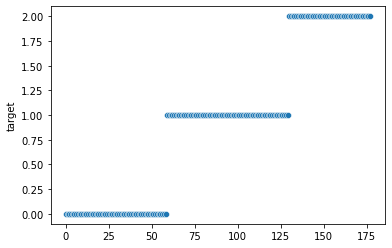

In [12]:
sns.scatterplot(df['target'])

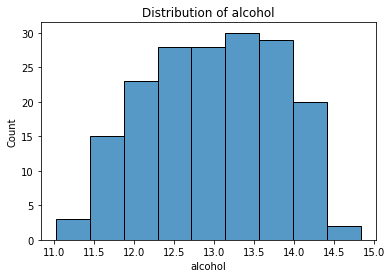

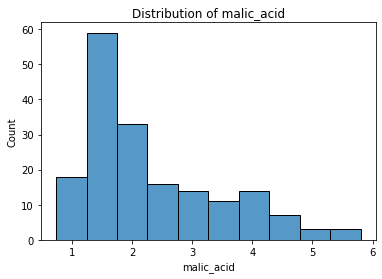

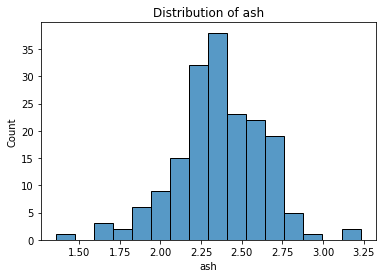

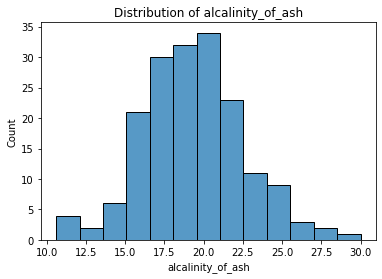

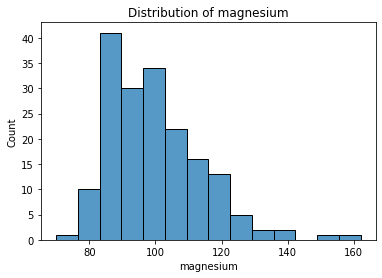

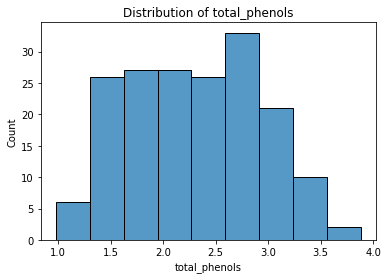

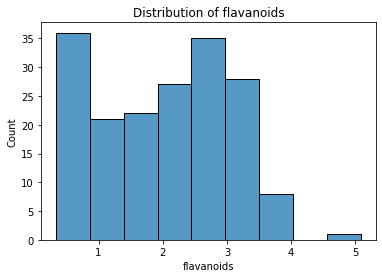

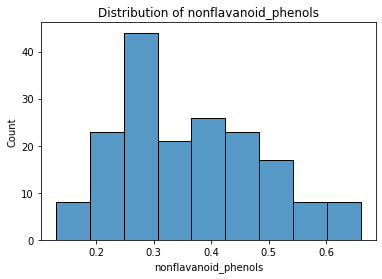

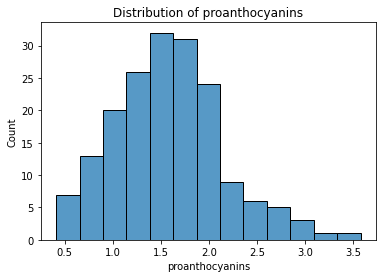

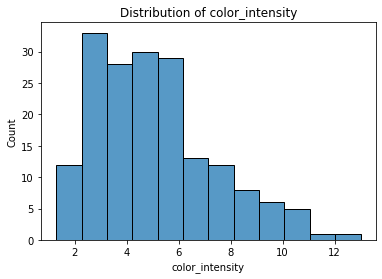

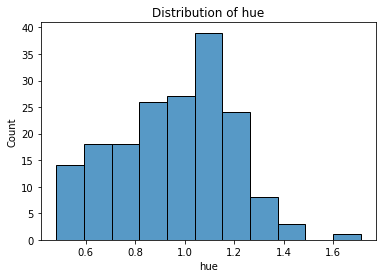

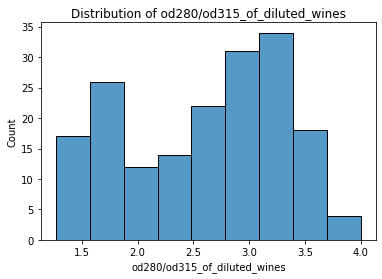

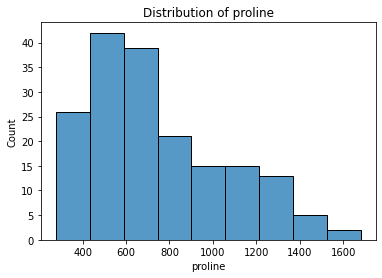

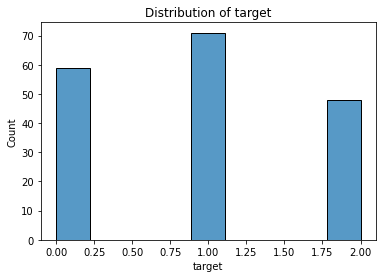

In [27]:
for col in df.columns:
    plt.figure(figsize=(6,4))  # Create a new figure for each plot
    sns.histplot(data=df, x=col)  # kde=True adds a smooth curve
    plt.title(f"Distribution of {col}")
    plt.show()

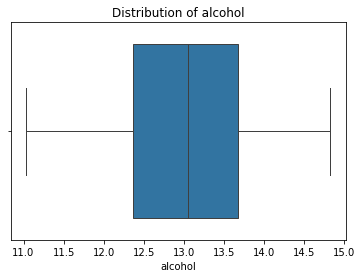

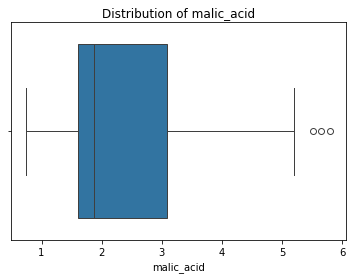

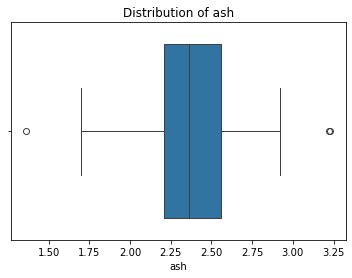

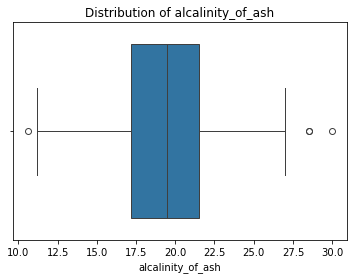

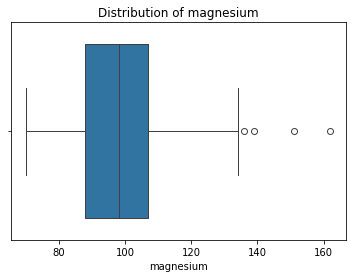

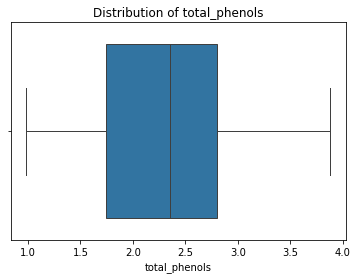

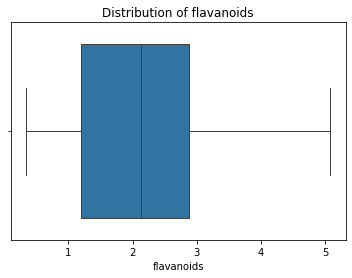

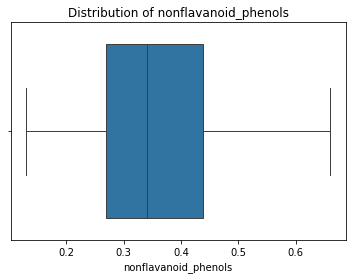

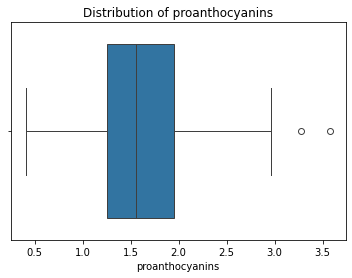

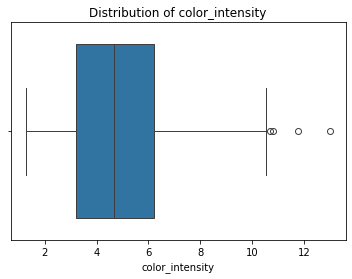

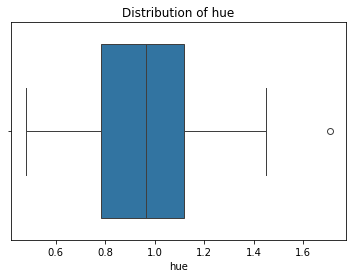

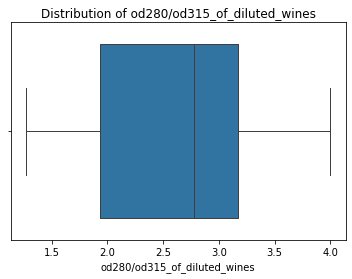

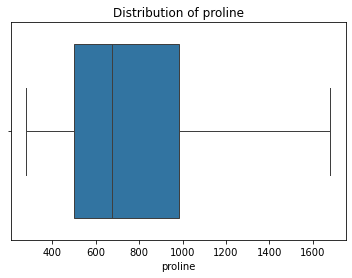

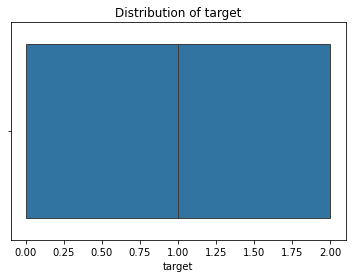

In [28]:
for col in df.columns:
    plt.figure(figsize=(6,4))  # Create a new figure for each plot
    sns.boxplot(data=df, x=col)  # kde=True adds a smooth curve
    plt.title(f"Distribution of {col}")
    plt.show()

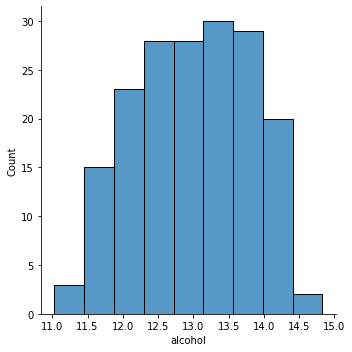

In [6]:
sns.displot(data=df,x='alcohol')

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
def cal_vif(x):
    vif = pd.DataFrame()
    vif['features'] = x.columns
    vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['vif'] = round(vif['vif'],2)
    vif = vif.sort_values(by='vif',ascending=False)
    return vif

cal_vif(df)

,features,vif
0,alcohol,226.04
2,ash,166.93
3,alcalinity_of_ash,89.04
4,magnesium,67.90
5,total_phenols,64.83
11,od280/od315_of_diluted_wines,59.42
6,flavanoids,47.21
10,hue,45.43
12,proline,24.14
13,target,19.09


#### VIF VALUES ARE QUIET HIGH FOR ALL FEATURES.
- FOR NOW I WILL LET IT BE.

In [7]:
X =df.drop('target',axis=1)
y = df['target']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Split the remaining 30% into validation and test sets (50-50 split)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [10]:
# 2ND WAY
print(f"Training set: {len(y_train)} samples")
print(f"Validation set: {len(y_val)} samples")
print(f"Test set: {len(y_test)} samples")

Training set: 124 samples
Validation set: 27 samples
Test set: 27 samples


In [11]:
# 2ND WAY
# Check class distribution in each set
print("Class distribution in training set:", np.bincount(y_train))
print("Class distribution in validation set:", np.bincount(y_val))
print("Class distribution in test set:", np.bincount(y_test))

Class distribution in training set: [41 50 33]
Class distribution in validation set: [ 9 10  8]
Class distribution in test set: [ 9 11  7]


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Training and Fitting base model

In [14]:
model = LogisticRegression(max_iter=200, class_weight='balanced',multi_class='multinomial', solver='saga')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=200,
                   multi_class='multinomial', solver='saga')

In [15]:
y_val_pred = model.predict(X_val)

In [16]:
print("Validation accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation accuracy: 0.9629629629629629
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00         8

    accuracy                           0.96        27
   macro avg       0.97      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



In [17]:
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(model, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")


K-Fold Accuracy Mean: 
 Train: 72.47 
 Validation: 71.90
K-Fold Accuracy Std: 
 Train: 1.19, 
 Validation: 14.52


#### HYPERPARAMETER TUNING

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score


# Define the scorer for F1-Weighted
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

params = {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'newton-cg', 'saga'],
        'max_iter': [100, 200, 500]}

grid_search = GridSearchCV(
    estimator=LogisticRegression(multi_class='multinomial', class_weight='balanced'),
    param_grid=params,
    scoring=f1_weighted_scorer,
    cv=5,
    n_jobs=-1)

In [19]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          multi_class='multinomial'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200, 500],
                         'solver': ['lbfgs', 'newton-cg', 'saga']},
             scoring=make_scorer(f1_score, average=weighted))

In [20]:
print("Best params: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best params:  {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
Best score:  0.9838240215924425


In [21]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=1, class_weight='balanced', multi_class='multinomial')

In [22]:
y_val_pred_best = best_model.predict(X_val)
print("Validation set accuracy with best model:", accuracy_score(y_val, y_val_pred_best))

Validation set accuracy with best model: 0.9629629629629629


In [23]:
print("Validation accuracy:", accuracy_score(y_val, y_val_pred_best))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred_best))

Validation accuracy: 0.9629629629629629
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00         8

    accuracy                           0.96        27
   macro avg       0.97      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



In [24]:
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(best_model, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")


K-Fold Accuracy Mean: 
 Train: 97.07 
 Validation: 93.33
K-Fold Accuracy Std: 
 Train: 0.84, 
 Validation: 7.78


In [25]:
feature_importance = pd.Series(best_model.coef_[0], index=X.columns).sort_values(ascending=False)
print("Top features:\n", feature_importance.head(20))

Top features:
 proline                         0.856817
alcohol                         0.725979
flavanoids                      0.679587
od280/od315_of_diluted_wines    0.564722
ash                             0.386989
total_phenols                   0.327546
magnesium                       0.110933
malic_acid                      0.087034
color_intensity                 0.077099
hue                             0.076008
proanthocyanins                 0.007783
nonflavanoid_phenols           -0.005227
alcalinity_of_ash              -0.820151
dtype: float64


### RANDOM FORREST

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [27]:
# Defining parameters -

params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

In [28]:
grid = GridSearchCV(estimator = RandomForestClassifier(class_weight='balanced',verbose=1),
                    param_grid = params,
                    scoring = 'f1_weighted',
                    cv = 3,
                    n_jobs=-1
                    )

In [29]:
grid.fit(X, y)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'n_estimators': 100}
Best score:  0.9044844225503796


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [30]:
best_model_rf = grid.best_estimator_

In [31]:
best_model_rf

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=10, verbose=1)

In [32]:
y_val_pred_best_rf = best_model_rf.predict(X_val)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [33]:
print("Classification Report:\n", classification_report(y_val, y_val_pred_best_rf))
print("Validation accuracy:", accuracy_score(y_val, y_val_pred_best_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.37      1.00      0.54        10
           2       0.00      0.00      0.00         8

    accuracy                           0.37        27
   macro avg       0.12      0.33      0.18        27
weighted avg       0.14      0.37      0.20        27

Validation accuracy: 0.37037037037037035


In [34]:
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(best_model_rf, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

K-Fold Accuracy Mean: 
 Train: 100.00 
 Validation: 90.95
K-Fold Accuracy Std: 
 Train: 0.00, 
 Validation: 10.61


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


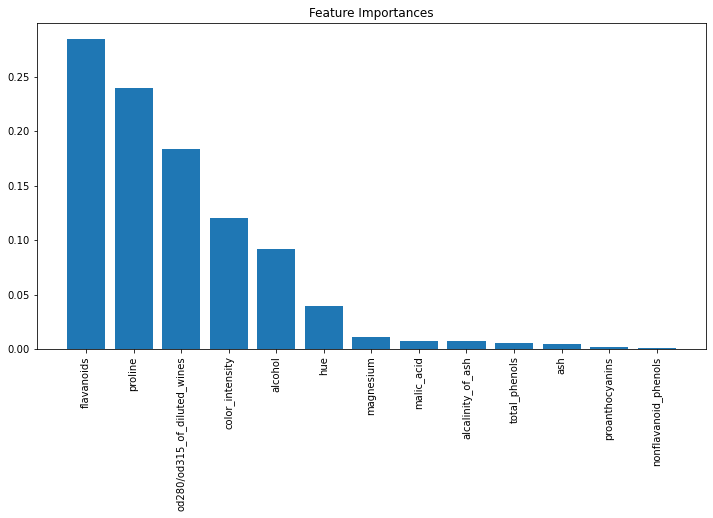

In [35]:
feature_importances = best_model_rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Plotting feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

#### CLASSIFICATION REPORT

In [38]:
# RF
print("Classification Report:\n", classification_report(y_val, y_val_pred_best_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.37      1.00      0.54        10
           2       0.00      0.00      0.00         8

    accuracy                           0.37        27
   macro avg       0.12      0.33      0.18        27
weighted avg       0.14      0.37      0.20        27



In [39]:
# LR-Tuned
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred_best))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00         8

    accuracy                           0.96        27
   macro avg       0.97      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



In [40]:
# LR-Base
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00         8

    accuracy                           0.96        27
   macro avg       0.97      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



#### CONFUSION MATRIX

In [41]:
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_best_rf))

Confusion Matrix:
 [[ 0  9  0]
 [ 0 10  0]
 [ 0  8  0]]


In [42]:
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_best))

Confusion Matrix:
 [[9 0 0]
 [1 9 0]
 [0 0 8]]


In [43]:
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

Confusion Matrix:
 [[9 0 0]
 [1 9 0]
 [0 0 8]]


#### AUC CURVE

In [44]:
from sklearn.metrics import roc_auc_score

In [45]:
logreg_score = roc_auc_score(y_val, best_model.predict_proba(X_val), multi_class='ovr')
logreg_rf_score = roc_auc_score(y_val, best_model_rf.predict_proba(X_val), multi_class='ovr')

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [46]:
print("Logistic Regression AUC:", logreg_score)
print("Random Forest AUC:", logreg_rf_score)

Logistic Regression AUC: 1.0
Random Forest AUC: 0.6111971104231166


#### NOTE: IN EVERY METRIC i.e 'CLASSIFICATION REPORT', 'ACCURACY SCORE', 'ROC CURVE' THE LOGISTIC REGRESSION PERFORMS BETTER.

### TRYING SMOTE FOR OVER-SAMPLING

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

best_model_rf.fit(X_train_balanced, y_train_balanced)
auc_score_rf_smote = roc_auc_score(y_test, best_model_rf.predict_proba(X_test), multi_class='ovr')
auc_score_rf_smote

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


1.0

In [49]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [50]:
# Create a pipeline with SMOTE and Random Forest
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', best_model_rf)
])

# Use StratifiedKFold for preserving class distributions
cv = StratifiedKFold(n_splits=5)

# Evaluate using F1-score (better for imbalanced datasets)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring=make_scorer(f1_score, average='macro'))

print("Cross-Validation F1 Score (macro):", np.mean(scores))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Cross-Validation F1 Score (macro): 0.914748239559283


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


### REDUCING FEATURES BY FEATURE SELECTION

In [51]:
feature_importance = pd.Series(best_model.coef_[0], index=X.columns).sort_values(ascending=False)
print("Top features:\n", feature_importance.head(20))

Top features:
 proline                         0.856817
alcohol                         0.725979
flavanoids                      0.679587
od280/od315_of_diluted_wines    0.564722
ash                             0.386989
total_phenols                   0.327546
magnesium                       0.110933
malic_acid                      0.087034
color_intensity                 0.077099
hue                             0.076008
proanthocyanins                 0.007783
nonflavanoid_phenols           -0.005227
alcalinity_of_ash              -0.820151
dtype: float64


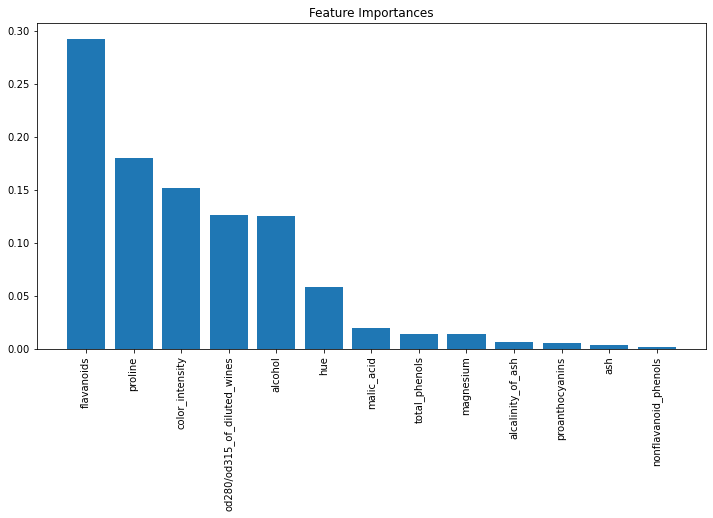

In [52]:
feature_importances = best_model_rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Plotting feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

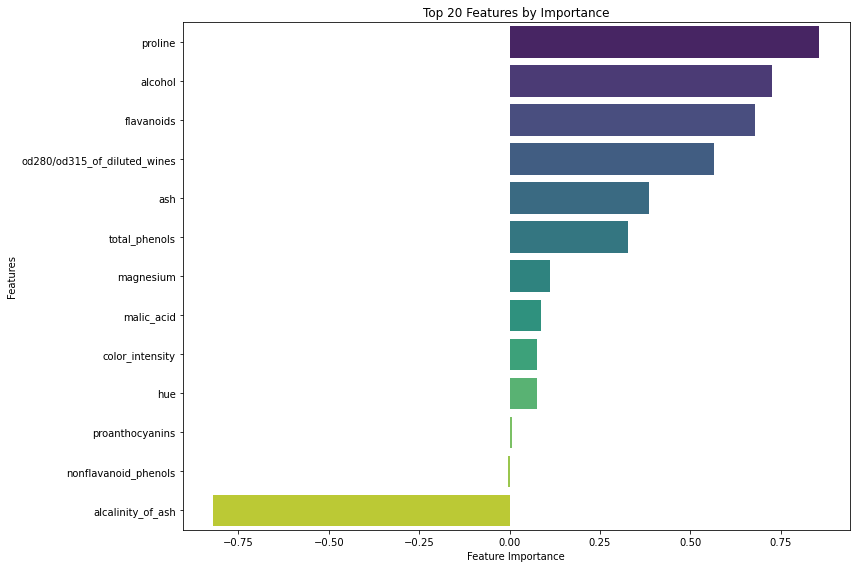

In [53]:
# Plotting the top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.head(20), y=feature_importance.head(20).index, palette="viridis")

# Add labels and title
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 20 Features by Importance")
plt.tight_layout()
plt.show()


#### NOTE: FROM FEATURE SELECTION, SELECTING ONLY TOP 6 FEATURES FOR TRAINING INTO LOGISTIC REGRESSION.

In [36]:
old_features = np.array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
                         'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
                         'proanthocyanins', 'color_intensity', 'hue',
                         'od280/od315_of_diluted_wines', 'proline'])

# selected features after feature selection
selected_features = ['proline', 'alcohol', 'flavanoids', 'od280/od315_of_diluted_wines', 'ash', 'total_phenols','magnesium','malic_acid','color_intensity','hue']


In [37]:

X_train_df = pd.DataFrame(X_train, columns=old_features)
X_train_selected = X_train_df[selected_features].to_numpy()  # Convert back to NumPy

X_val_df = pd.DataFrame(X_val, columns=old_features)
X_val_selected = X_val_df[selected_features].to_numpy()

X_test_df = pd.DataFrame(X_test, columns=old_features)
X_test_selected = X_test_df[selected_features].to_numpy()

#### TRAINING

In [38]:
# Define the scorer for F1-Weighted
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

params = {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'newton-cg', 'saga'],
        'max_iter': [100, 200, 500]}

grid_search_new = GridSearchCV(
    estimator=LogisticRegression(multi_class='multinomial', class_weight='balanced'),
    param_grid=params,
    scoring=f1_weighted_scorer,
    cv=5,
    n_jobs=-1)

#### FITTING

In [39]:
grid_search_new.fit(X_train_selected, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          multi_class='multinomial'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200, 500],
                         'solver': ['lbfgs', 'newton-cg', 'saga']},
             scoring=make_scorer(f1_score, average=weighted))

#### BEST PARAMETER

In [40]:
print("Best params: ", grid_search_new.best_params_)
print("Best score: ", grid_search_new.best_score_)

Best params:  {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
Best score:  0.9837486068111454


In [41]:
best_model_selected = grid_search_new.best_estimator_
best_model_selected

LogisticRegression(C=0.1, class_weight='balanced', multi_class='multinomial')

#### SCORE ON VALIDATION

In [42]:
y_val_pred_best_selected = best_model_selected.predict(X_val_selected)
print("Validation set accuracy with best model:", accuracy_score(y_val, y_val_pred_best_selected))

Validation set accuracy with best model: 1.0


In [43]:
print("Validation accuracy:", accuracy_score(y_val, y_val_pred_best_selected))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred_best_selected))

Validation accuracy: 1.0
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [44]:
kfold = KFold(n_splits=10)
cv_acc_results_selected = cross_validate(best_model_selected, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results_selected['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results_selected['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results_selected['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results_selected['test_score'].std()*100:.2f}")


K-Fold Accuracy Mean: 
 Train: 96.01 
 Validation: 93.33
K-Fold Accuracy Std: 
 Train: 0.69, 
 Validation: 6.94


#### TESTING ON TEST DATASET

In [ ]:
# retraining the model on the full dataset (training + validation)

In [45]:
grid_search_new.best_params_

{'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}

In [46]:
grid_search_new.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', multi_class='multinomial')

In [47]:
# Extracting best hyperparameters
best_params = grid_search_new.best_params_

# Manually creating and retrain model with best hyperparameters
final_model = LogisticRegression(**best_params)
final_model.fit(np.vstack([X_train_selected, X_val_selected]), np.hstack([y_train, y_val]))


LogisticRegression(C=0.1)

In [49]:
# Now, test this newly trained model on the test set
y_test_pred_selected = final_model.predict(X_test_selected)

In [50]:
# Evaluate performance
final_test_accuracy_selected = accuracy_score(y_test, y_test_pred_selected)
print(f"Final Test Accuracy: {final_test_accuracy_selected:.4f}")

Final Test Accuracy: 0.9630


In [51]:
print(classification_report(y_test, y_test_pred_selected))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         7

    accuracy                           0.96        27
   macro avg       0.97      0.97      0.97        27
weighted avg       0.97      0.96      0.96        27



In [55]:
from sklearn.metrics import roc_auc_score
logreg_score_selected = roc_auc_score(y_test, final_model.predict_proba(X_test_selected), multi_class='ovr')
logreg_score_selected

1.0

#### SAVING A MODEL

In [56]:
import pickle

In [57]:
# saving the linear model as a pickle file

model_pkl_file = "wine_logreg_model.pkl" # giving a name for pickle file 

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(final_model, file)  # saving the model

In [58]:
selected_features = ['proline', 'alcohol', 'flavanoids', 'od280/od315_of_diluted_wines', 'ash', 'total_phenols','magnesium','malic_acid','color_intensity','hue']

# Save the selected features for consistency during inference
with open('selected_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

In [64]:
# SAVING A FULL DATAFRAME OF WINE DATASET.
df.to_csv('wine.csv')

In [65]:
# Saving standard scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [72]:
scaler = StandardScaler()
X_train_selected = X[selected_features]  # Only selected features
scaler.fit(X_train_selected)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)